In [1]:
from leapfrog_integrator import lotka_volterra

import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [2]:
# Parameters (using your example values)
T = 50
number_observations = 5000  # More points for smoother Euler integration
initial_state = (10.0, 1.0)
# a, b, c, h in your example map to alpha, beta, gamma, delta in our function
params = jnp.array([1.1, 0.4, 0.1, 0.4])  # [alpha, beta, gamma, delta]


In [3]:
# Run JAX simulation
x_jax, y_jax = lotka_volterra(params, T, number_observations, initial_state)

In [4]:
# Create time points
t_jax = jnp.linspace(0, T, number_observations)

# Convert to numpy for plotting
t_np = np.array(t_jax)
x_np = np.array(x_jax)
y_np = np.array(y_jax)


In [5]:
# Compare with scipy solution
def sim(variables, t, params):
    x, y = variables
    alpha, beta, gamma, delta = params
    dxdt = alpha * x - beta * x * y
    dydt = gamma * x * y - delta * y
    return [dxdt, dydt]

In [6]:
t_scipy = np.linspace(0, T, 100)
y0 = [initial_state[0], initial_state[1]]
y_scipy = odeint(sim, y0, t_scipy, args=(params,))

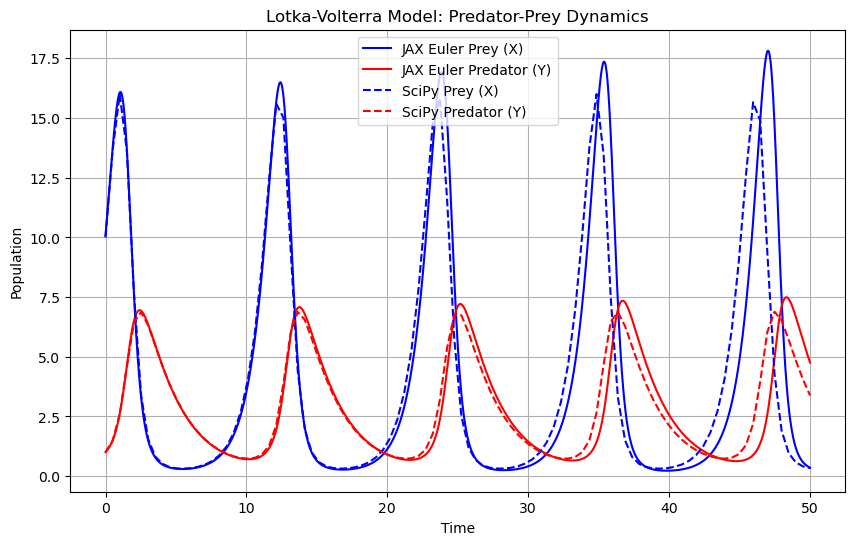

In [7]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_np, x_np, 'b-', label='JAX Euler Prey (X)')
plt.plot(t_np, y_np, 'r-', label='JAX Euler Predator (Y)')
plt.plot(t_scipy, y_scipy[:, 0], 'b--', label='SciPy Prey (X)')
plt.plot(t_scipy, y_scipy[:, 1], 'r--', label='SciPy Predator (Y)')

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka-Volterra Model: Predator-Prey Dynamics')
plt.legend()
plt.grid(True)
plt.show()